https://github.com/Student204161/computational-social-science-assignments

### Contributions:
Each member of the group has participated equally on the project.

# Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity

# Part 2: Communities


### Exercise 2: Zachary's karate club:

In [27]:
# Vi har startet med at bruge netwulf, men den får nogle problemer med størrelsen er for stor til at ligge på jupyter, så vi har valgt at bruge matplotlib længere nede.
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import numpy as np

karate_data = nx.karate_club_graph()
club = nx.get_node_attributes(karate_data, "club")

node_color = ["red" if club[node] == "Mr. Hi" else "green" for node in karate_data.nodes()]

config = {
    "Node color": node_color,
    "Node size": 1,
    "Node stroke width": 0,
    "Edge width": 1,
    "Zoom": 0.5,
}

nw.visualize(karate_data, config=config)

({'xlim': [0, 667],
  'ylim': [0, 667],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 0,
    'target': 1,
    'width': 1.5118578920369088,
    'weight': 4},
   {'source': 0, 'target': 2, 'width': 1.6903085094570331, 'weight': 5},
   {'source': 0, 'target': 3, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 4, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 5, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 6, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 7, 'width': 1.0690449676496976, 'weight': 2},
   {'source': 0, 'target': 8, 'width': 1.0690449676496976, 'weight': 2},
   {'source': 0, 'target': 10, 'width': 1.0690449676496976, 'weight': 2},
   {'source': 0, 'target': 11, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 12, 'width': 0.7559289460184544, 'weight': 1},
   {'source': 0, 'target': 13, 

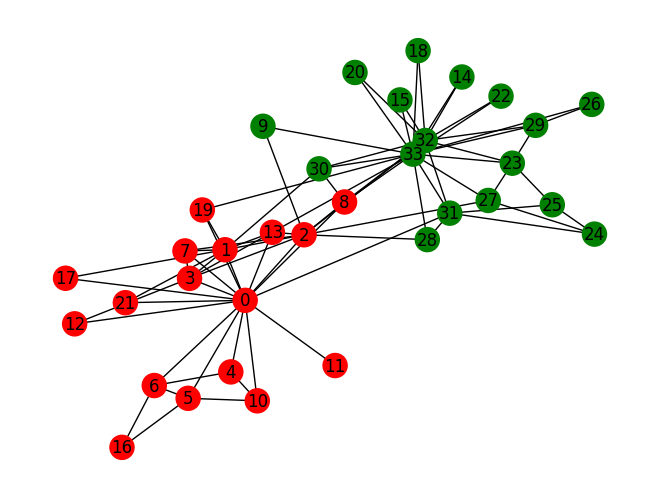

In [10]:
color = []
for node in karate_data.nodes():
    if club[node] == "Mr. Hi":
        color.append("red")
    else:
        color.append("green")
MrHi = []
Officer = []
for i in range(len(color)):
    if club[i] == "Mr. Hi":
        MrHi.append(i)
    else:
        Officer.append(i)
nx.draw(karate_data, with_labels=True, node_color=color)
plt.show()

In [11]:
#Funktion for molarity
def calculate_modularity(karate_data, communities):
    total_edges = karate_data.number_of_edges()
    modularity_score = 0.0
    for community in communities:
        edges_within_community = karate_data.subgraph(community).number_of_edges()
        sum_of_degrees_in_community = sum(karate_data.degree(node) for node in community)
        proportion_of_edges_within_community = edges_within_community / total_edges
        proportion_of_sum_of_degrees = (sum_of_degrees_in_community / (2 * total_edges)) ** 2
        modularity_score += proportion_of_edges_within_community - proportion_of_sum_of_degrees
    return modularity_score

#### Modularity
The modularity of a network is a metric that assesses how effectively it is separated into communities. Modularity is defined as the difference between the actual number of edges within communities and the predicted number of edges if the network were randomly linked while keeping node degrees constant. In other words, modularity assesses how well the network is divided into dense clusters of nodes.

In [12]:
current_communities = [Officer, MrHi]
modularity_from_current_communities = calculate_modularity(karate_data, current_communities)
print(modularity_from_current_communities)

0.3582347140039447


In [13]:
import random
num_edges = karate_data.number_of_edges() * 2

def double_edge_swap_algorithm(original_graph, num_swaps):
    graph_copy = original_graph.copy()
    for i in range(num_swaps):
        edge1 = random.choice(list(graph_copy.edges()))
        edge2 = random.choice(list(graph_copy.edges()))
        u, v = edge1
        x, y = edge2
        if (u != x) and (v != y) and (not graph_copy.has_edge(u, y)) and (not graph_copy.has_edge(x, v)):
            graph_copy.remove_edges_from([edge1, edge2])
            graph_copy.add_edges_from([(u, y), (x, v)])

    return graph_copy

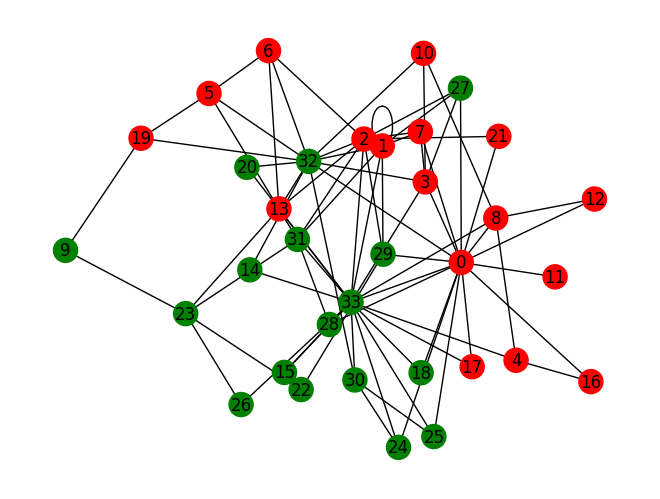

In [14]:
karate_data_double_edge_swap = double_edge_swap_algorithm(karate_data, num_edges)
nx.draw(karate_data_double_edge_swap, with_labels=True, node_color=color)
plt.show()  

In [15]:
original_degrees = [degree for node, degree in karate_data.degree()]
new_degrees = [degree for node, degree in karate_data_double_edge_swap.degree()]
print("Original:", original_degrees)
print("New     :", new_degrees)

errors = sum([1 for i in range(len(original_degrees)) if original_degrees[i] != new_degrees[i]])
print("Errors:", errors)
calculate_modularity(karate_data_double_edge_swap, [Officer, MrHi])

Original: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
New     : [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Errors: 0


0.07618343195266267

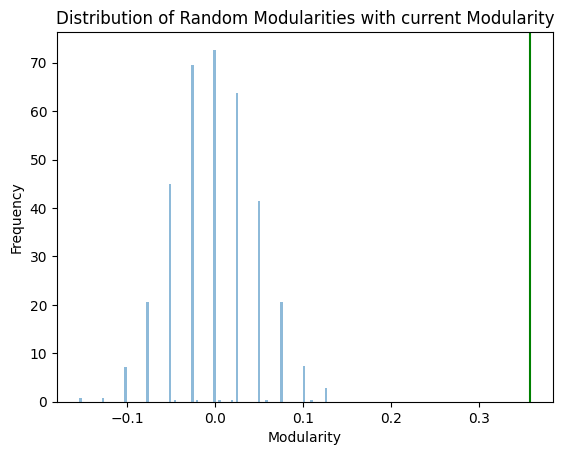

In [20]:
num_iterations = 1000
modularities = []
for i in range(num_iterations):
        current_graph = double_edge_swap_algorithm(karate_data, num_edges)
        current_modularity = calculate_modularity(current_graph, current_communities)
        modularities.append(current_modularity)
mean = np.mean(modularities)
std = np.std(modularities)
plt.hist(modularities, bins=100, alpha=0.5, density=True)
plt.axvline(x=modularity_from_current_communities, color='g')
plt.xlabel('Modularity')
plt.ylabel('Frequency')
plt.title('Distribution of Random Modularities with current Modularity')
plt.show()


In [77]:
print("mean:", mean)
print("std:", std)
print("current_Modularity:",modularity_from_current_communities)
if modularity_from_current_communities < mean - 2 * std or modularity_from_current_communities > mean + 2 * std:
    print("Modularity value is significantly different")
else: 
    print("Modularity value is not significantly different")

mean: -0.0035600208150158856
std: 0.04551485299189223
current_Modularity: 0.3582347140039447
Modularity value is significantly different


It can be seen that since the modularity is very different, we can observe that this partitioning is far superior to random partitioning.

In [38]:
#Louvain-algorithm implementation
#NEED 11 & 12
partition = community.best_partition(karate_data)

louvain_colors = ["green", "red", "yellow", "cyan"]
node_color = [louvain_colors[partition[i]] for i in range(len(karate_data.nodes()))]

nx.draw(karate_data, with_labels=True, node_color=node_color)
plt.show()


AttributeError: module 'community' has no attribute 'best_partition'

NEED 11 & 12

### Exercise 3: Community detection on the network of Computational Social Scientists

# Part 3: TF-IDF.

### Exercise 4: TF-IDF and the Computational Social Science communities

### Exercise 5: The Wordcloud